In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://video.ittensive.com/time-series/ittensive.time.series.02a.csv',sep=';', names=['Дата', 'Объем'])

In [4]:
data.head()

,Дата,Объем
0,01.01.2012,17.8
1,01.02.2012,20.1
2,01.03.2012,17.1
3,01.04.2012,18.2
4,01.05.2012,17.2


In [22]:
data.shape

(121, 2)

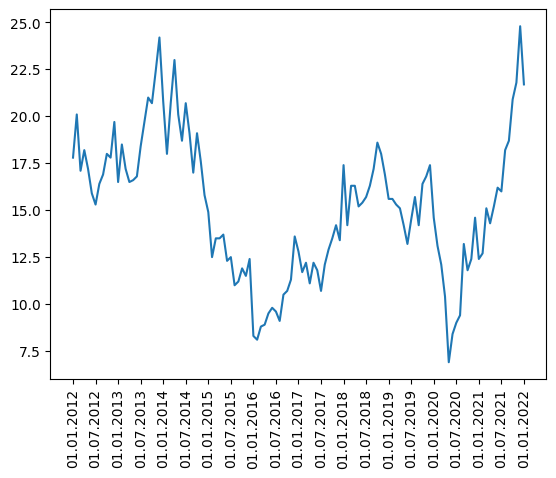

In [12]:
plt.plot(data['Дата'], data['Объем'])
plt.xticks(data['Дата'].values[::6], rotation=90)
plt.show()


In [23]:
model = SARIMAX(data['Объем'][:-12], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
print(model.summary())








                                     SARIMAX Results                                      
Dep. Variable:                              Объем   No. Observations:                  109
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -183.429
Date:                            Thu, 17 Jul 2025   AIC                            376.858
Time:                                    13:22:39   BIC                            389.679
Sample:                                         0   HQIC                           382.040
                                            - 109                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1370      0.316     -0.433      0.665      -0.757       0.483
ma.L1         -0.2071      0.323   

In [24]:
aic_best = model.aic

seasonal_order = (1, 1, 1, 12)
order = (1, 1, 1)

for p in range(1, 3):
    for d in range(1, 3):
        for q in range(1, 3):
            for P in range(1, 3):
                for D in range(1, 3):
                    for Q in range(1, 3):
                        model_ = SARIMAX(data['Объем'], order=(p, d, q), seasonal_order=(P, D, Q, 12)).fit()
                        if model_.aic < aic_best:
                            aic_best = model_.aic
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, 12)
print(f'best seasonal_order: {seasonal_order}, order: {order}')




c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warning

best seasonal_order: (2, 2, 2, 12), order: (2, 2, 1)


In [25]:
model = SARIMAX(data['Объем'], order=order, seasonal_order=seasonal_order).fit()
print(model.summary())


c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                        SARIMAX Results                                        
Dep. Variable:                                   Объем   No. Observations:                  121
Model:             SARIMAX(2, 2, 1)x(2, 2, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Thu, 17 Jul 2025   AIC                             16.000
Time:                                         13:25:59   BIC                             36.431
Sample:                                              0   HQIC                            24.256
                                                 - 121                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9964   4.73e-08  -4.22e+07      0.000      -1.996      -1

c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1431: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\Samat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


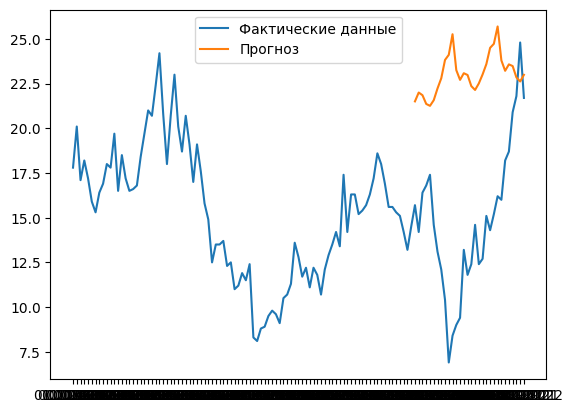

In [35]:
forecast = model.forecast(steps=30)
plt.plot(data['Дата'], data['Объем'], label='Фактические данные')
plt.plot(data['Дата'][-30:], forecast, label='Прогноз')
plt.legend()
plt.show()




In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model = ARIMA(data['Объем'], order=(1, 1, 1)).fit()

In [38]:
print(model.summary())


                                    SARIMAX Results                                     
Dep. Variable:                            Объем   No. Observations:                  121
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -205.983
Date:                          Thu, 17 Jul 2025   AIC                            421.965
Time:                                  13:32:43   BIC                            435.376
Sample:                                       0   HQIC                           427.403
                                          - 121                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2130      0.327     -0.652      0.514      -0.853       0.427
ma.L1         -0.0887      0.346     -0.256      0.

In [ ]:
aic_best = model.aic
for p in range(1, 3):
    for d in range(1, 3):
        for q in range(1, 3):
            model_ = ARIMA(data['Объем'], order=(p, d, q)).fit()
            if model_.aic < aic_best:
                aic_best = model_.aic
                order = (p, d, q)
print(f'best order: {order}')





